# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('C:/Users/anigu/Desktop/Anirudh/Python/GL Study Material/Lab 4/marketing.csv')
print(df.head(5))
print("Shape of the dataset:", df.shape)
print(df.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04/09/2012       58       635  ...                   10                  4   
1  08/03/2014       38        11  ...                    1                  2   
2  21/08/2013       26       426  ...                    2                 10   
3  10/02/2014       26        11  ...                    0                  4   
4  19/01/2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
missing_percentage = (df.isna().mean() * 100).round(2)
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Response               0.00
dtype: float64


In [4]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
missing_percentage_check = (df.isna().mean() * 100).round(2)
print("Percentage of missing values after filling the missing values with the mean:")
print(missing_percentage_check)

Percentage of missing values after filling the missing values with the mean:
ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [5]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [6]:
redundant_columns = ['ID', 'Dt_Customer']
df = df.drop(redundant_columns, axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0       635         88              546  ...                   10   
1        11          1                6  ...                    1   
2       426         49              127  ...                    2   
3        11          4               20  ...                    0   
4       173         43              118  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4       

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [7]:
unique_categories = df['Marital_Status'].unique()
print("Unique Categories in 'Marital_Status':")
print(unique_categories)
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')
unique_categories_updated = df['Marital_Status'].unique()
print("\nUnique Categories in 'Marital_Status' after Grouping:")
print(unique_categories_updated)

Unique Categories in 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Unique Categories in 'Marital_Status' after Grouping:
['Single' 'relationship']


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [8]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7          

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [9]:
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 
                                'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
0       635         88              546  ...                  7             0   
1        11          1                6  ...                  5             0   
2       426         49              127  ...                  4             0   
3        11          4               20  ...                  6             0   
4       173         43              118  ...                  5             0   

   AcceptedCmp4  AcceptedC

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [10]:
df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  \
0       635         88              546  ...             0             0   
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  R

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [11]:
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                             'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

### 11. Drop those columns which we have used above for obtaining new features

In [12]:
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
              'AcceptedCmp4', 'AcceptedCmp5', 'Response','Kidhome', 'Teenhome','NumWebPurchases', 'NumCatalogPurchases', 
              'NumStorePurchases', 'NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
               'MntSweetProducts', 'MntGoldProds','NumWebVisitsMonth'], axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Recency  Complain  \
0        1957  Graduation         Single  58138.0       58         0   
1        1954  Graduation         Single  46344.0       38         0   
2        1965  Graduation   relationship  71613.0       26         0   
3        1984  Graduation   relationship  26646.0       26         0   
4        1981         PhD   relationship  58293.0       94         0   

   Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  
0            1617                   25     0                 1  
1              27                    6     2                 0  
2             776                   21     0                 0  
3              53                    8     1                 0  
4             422                   19     1                 0  


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [13]:
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)
dfc = df.copy()
print(df.head())

    Education Marital_Status   Income  Recency  Complain  Total_Expenses  \
0  Graduation         Single  58138.0       58         0            1617   
1  Graduation         Single  46344.0       38         0              27   
2  Graduation   relationship  71613.0       26         0             776   
3  Graduation   relationship  26646.0       26         0              53   
4         PhD   relationship  58293.0       94         0             422   

   Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  
0                   25     0                 1   66  
1                    6     2                 0   69  
2                   21     0                 0   58  
3                    8     1                 0   39  
4                   19     1                 0   42  


### 13. Encode the categorical variables in the dataset

In [14]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
print(df.head())

   Education  Marital_Status   Income  Recency  Complain  Total_Expenses  \
0          2               0  58138.0       58         0            1617   
1          2               0  46344.0       38         0              27   
2          2               1  71613.0       26         0             776   
3          2               1  26646.0       26         0              53   
4          4               1  58293.0       94         0             422   

   Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  
0                   25     0                 1   66  
1                    6     2                 0   69  
2                   21     0                 0   58  
3                    8     1                 0   39  
4                   19     1                 0   42  


### 14. Standardize the columns, so that values are in a particular range

In [15]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [16]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)


Covariance matrix 
 [[ 1.00044663 -0.01375403  0.1200273  -0.01173369 -0.05056252  0.09209518
   0.09405439  0.05321304  0.06327892  0.17146685]
 [-0.01375403  1.00044663  0.00463847 -0.00450972 -0.00520466 -0.01775232
   0.00671037  0.03917598 -0.06004206 -0.0042384 ]
 [ 0.1200273   0.00463847  1.00044663 -0.00394826 -0.02723528  0.66500337
   0.5636214  -0.29084155  0.28717443  0.16101378]
 [-0.01173369 -0.00450972 -0.00394826  1.00044663  0.01323699  0.02044173
   0.00574294  0.01806145 -0.08900203  0.01987996]
 [-0.05056252 -0.00520466 -0.02723528  0.01323699  1.00044663 -0.03707503
  -0.02059185  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518 -0.01775232  0.66500337  0.02044173 -0.03707503  1.00044663
   0.75423984 -0.49911047  0.4564099   0.11135611]
 [ 0.09405439  0.00671037  0.5636214   0.00574294 -0.02059185  0.75423984
   1.00044663 -0.24589955  0.25816052  0.16837908]
 [ 0.05321304  0.03917598 -0.29084155  0.01806145  0.03108014 -0.49911047
  -0.24589955  1.00044663 -0.25

In [17]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 9.68616360e-02 -1.14040238e-02 -5.42962436e-01 -4.78349449e-02
   5.74039740e-02  2.94125705e-01 -6.71991659e-01 -3.76199725e-01
   1.00941783e-01 -1.72617973e-02]
 [-2.11998107e-02 -6.97613253e-04 -7.79504963e-02 -8.07214688e-03
   1.10415084e-01 -1.19602921e-01 -2.14712105e-01  2.64491403e-01
  -4.20392056e-01  8.21051656e-01]
 [ 4.70545377e-01 -1.73616866e-01 -1.09418121e-01  8.07252800e-01
  -2.16588775e-01  1.40590207e-01  9.96061082e-02  7.18687002e-02
  -2.41932967e-02  4.96660628e-02]
 [-1.22664315e-02 -3.96044078e-02 -1.24037867e-01  1.76593781e-02
   2.23098213e-02 -2.08718955e-01 -2.79156905e-01  6.82882884e-01
   6.27676007e-01 -1.69607942e-02]
 [-3.33407565e-02  5.96533459e-03 -2.55578632e-02  2.01432755e-03
  -1.40338324e-02  1.06301760e-01 -2.85416902e-01  4.74828140e-01
  -6.27515907e-01 -5.34787575e-01]
 [ 5.54145758e-01  8.05819937e-01  4.81494967e-02 -1.73844596e-01
  -5.38663994e-02  4.14557290e-02  1.36323887e-02  7.44620938e-02
   1.73613642e-0

In [18]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [28.269916058136026, 12.561558881024201, 10.508652122617878, 10.148898225632234, 9.962833994455531, 8.3793991687154, 7.198242940813632, 6.882143140591926, 4.462262869565128, 1.626092598448035]
Cummulative Variance Explained:  [ 28.26991606  40.83147494  51.34012706  61.48902529  71.45185928
  79.83125845  87.02950139  93.91164453  98.3739074  100.        ]


In [19]:
## Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [20]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [21]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,21036.208375
1,2,16261.593010
2,3,14849.905480
3,4,12811.479594
4,5,11470.016922
5,6,10664.505154
6,7,9900.680453
7,8,9468.324149
8,9,9057.644690
9,10,8669.933608


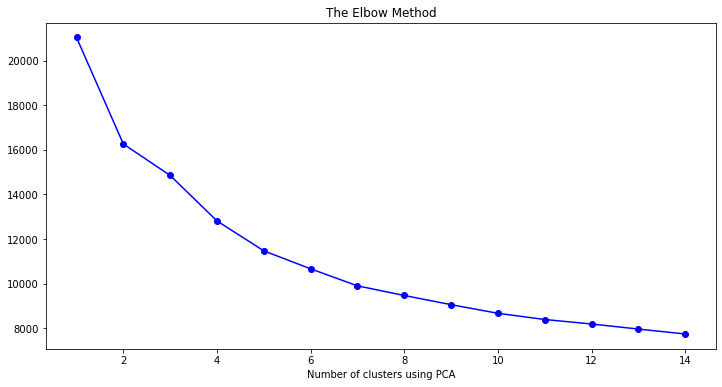

In [22]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [23]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=100)

In [24]:
## creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [25]:
## joining the label dataframe to the data_pca dataframe
kmeans_df = data_pca.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632,1
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299,2
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988,1
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251,2
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821,1


In [26]:
kmeans_df['Label'].value_counts()

2    1147
1     856
0     237
Name: Label, dtype: int64

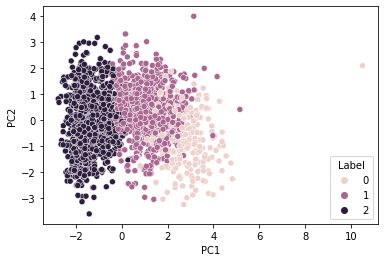

In [27]:
##visulalising the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue = 'Label', data = kmeans_df )
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

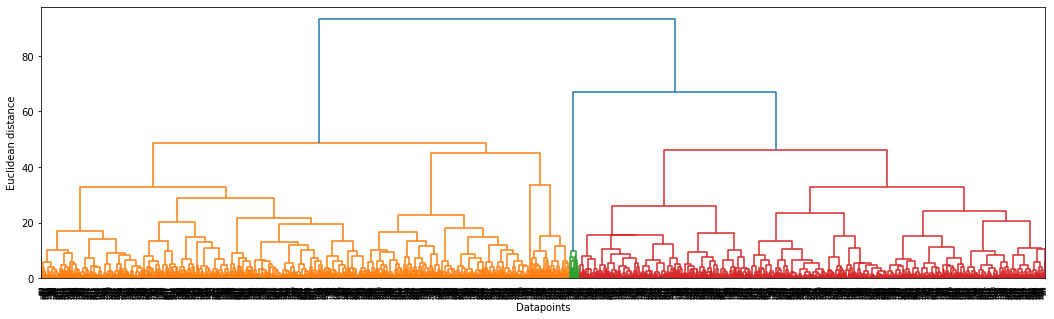

In [28]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.1953269278987601
3 0.20313571826900448
4 0.17395958717234267
5 0.14508245902819655
6 0.1553784680322984
7 0.1552619383470093
8 0.12893536402180128
9 0.11723007378493817
10 0.11995018104860722
11 0.1182900137805396
12 0.12042291646023351
13 0.11544079815492278
14 0.11642326253333647


We can observe from the above dendogram and as well as the silhoutte scores for different clusters, the highest silhoutte score is for clsuters 3

In [30]:
## Building hierarchical clustering model using the optimal clusters as 3
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [31]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [32]:
## joining the label dataframe with unscaled initial scale dataframe 
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,0,27,6,2,0,69,1
2,Graduation,relationship,71613.0,26,0,776,21,0,0,58,0
3,Graduation,relationship,26646.0,26,0,53,8,1,0,39,1
4,PhD,relationship,58293.0,94,0,422,19,1,0,42,0


### Visualization and Interpretation of results

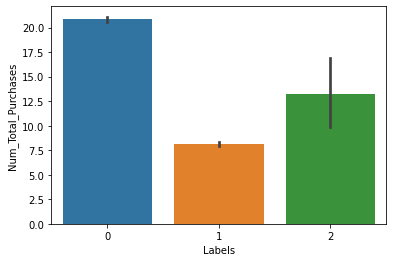

In [34]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

- In this case study, we have attempted to cluster marketing datadataset using K-means and agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
- We came up with 3 clusters using K-means

-The Total number of Purchases is highest for customers from Cluster 0
-The customers belonging to cluster 0 does maximum purchases, has maximum spend and have maximum income.


-----
## Happy Learning
-----